In [105]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
 
from datetime import datetime, date, timedelta
import pandas as pd
from pandas import DataFrame as df

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [106]:
# need to fdownload
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [107]:
stop_words = set(stopwords.words('english'))
symbol = ".,/:'\"’‘$%&;#()[]"
lemmatizer = WordNetLemmatizer()

font_path = './wordcloudFont/BebasNeue-Regular.ttf'

In [108]:
def date_to_string(date):
    month, day = date.month, date.day
    if(date.month < 10):
        month = "0"+str(month)
    if date.day < 10:
        day = "0"+str(day)
    return "{}-{}-{}".format(date.year, month, day)

In [109]:
def save_wordcloud(comment, start_date, end_date, output_dir):
    wc = WordCloud(stopwords = STOPWORDS, font_path = font_path,
                  background_color = "white", max_words = 2000,
                  max_font_size = 256, random_state = 42,
                  width = 1500, height = 1500)
    wc.generate(comment)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.savefig(output_dir+"wordcloud_{}_{}.png".format(start_date, end_date))
    plt.show()
    plt.close()

In [110]:
def filter_word(w):
    return not w in stop_words and w not in symbol and not w.isdigit()

In [111]:
def get_keyword_df(dataframe, start_date, end_date):
    start_time = datetime.strptime(start_date, "%Y-%m-%d")
    last_time = datetime.strptime(end_date, "%Y-%m-%d")
    last_time -= timedelta(days = 1)
    comment_words = ''
    while last_time >= start_time:
        date_df = dataframe[dataframe['date'] == date_to_string(last_time)]
        
        if date_df.empty:
            last_time -= timedelta(days = 1)
            continue
            
        texts = date_df['title']
        tokens = []
        sentences = ""
        for text in texts:
            try:
                sentence = text.strip().lower()
                token = word_tokenize(sentence)
                filtered_token = [lemmatizer.lemmatize(w) for w in token if filter_word(w)]
                comment_words += " ".join(filtered_token) + " "
            except:
                pass
        last_time -= timedelta(days = 1)
    return comment_words

In [112]:
def get_and_save_keyword(start_date, end_date, output_dir = "./data/news/wordcloud/"):
    input_df = pd.read_csv("./data/news/news_{}.csv".format(start_date[:4]))
    output = get_keyword_df(input_df, start_date, end_date)
    if len(output.split()) > 0:
        save_wordcloud(output, start_date, end_date, output_dir)

In [113]:
def save_montly_data_of_year(year):
    for month in range(1, 13):
        start = "{}-{}-01".format(year, month)
        if month < 12:
            end = "{}-{}-01".format(year, month+1)
        else:
            end = "{}-01-01".format(year+1)
        print(month)
        get_and_save_keyword(start, end)

1


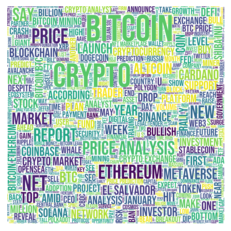

2


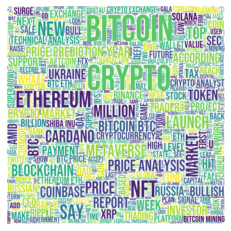

3


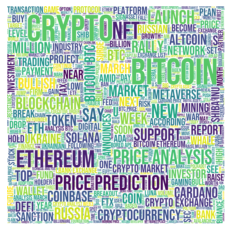

4


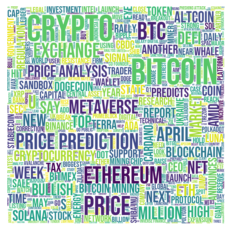

5
6
7
8
9
10
11
12


In [114]:
save_montly_data_of_year(2022)